In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [2]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [3]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-1.054904,2.754232,-0.780038,0.540024,-0.054982,0
1,-0.380745,1.222595,-2.024231,1.393598,1.268301,0
2,-0.386151,-0.250203,-2.058788,-0.170708,0.004415,1
3,-1.311762,0.661915,-1.671962,1.690566,0.609806,0
4,-0.272251,0.696651,0.037702,0.612268,1.911184,0


In [4]:
import random

In [5]:
# function for row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [6]:
# function for feature sampling
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [9]:
# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [10]:
df1 = combined_sampling(df,0.5,0.5)

<ipython-input-6-12db9cc58a3b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [11]:
df2 = combined_sampling(df,0.5,0.5)

<ipython-input-6-12db9cc58a3b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [12]:
df3 = combined_sampling(df,0.5,0.5)

<ipython-input-6-12db9cc58a3b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [13]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col3', 'col5', 'target'], dtype='object')
Index(['col4', 'col1', 'target'], dtype='object')
Index(['col2', 'col3', 'target'], dtype='object')


In [14]:
df3

,col2,col3,target
62,0.051572,-0.546930,0
53,-1.486959,0.045993,1
70,0.854101,-0.089598,0
0,2.754232,-0.780038,0
76,0.029349,0.359692,0
65,0.321184,-1.766915,0
14,-0.536642,-1.202322,1
96,-0.858457,-0.350044,0
52,1.569931,-0.827684,0
80,-0.785617,-0.955429,1


In [15]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [16]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

In [17]:
from sklearn.tree import plot_tree

[Text(0.6160714285714286, 0.9375, 'x[1] <= 2.343\ngini = 0.487\nsamples = 50\nvalue = [29.0, 21.0]'),
 Text(0.4107142857142857, 0.8125, 'x[1] <= 0.482\ngini = 0.444\nsamples = 42\nvalue = [28, 14]'),
 Text(0.5133928571428572, 0.875, 'True  '),
 Text(0.21428571428571427, 0.6875, 'x[0] <= -1.175\ngini = 0.165\nsamples = 11\nvalue = [10, 1]'),
 Text(0.14285714285714285, 0.5625, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.2857142857142857, 0.5625, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.6071428571428571, 0.6875, 'x[1] <= 1.157\ngini = 0.487\nsamples = 31\nvalue = [18, 13]'),
 Text(0.42857142857142855, 0.5625, 'x[1] <= 0.902\ngini = 0.469\nsamples = 16\nvalue = [6, 10]'),
 Text(0.35714285714285715, 0.4375, 'x[1] <= 0.654\ngini = 0.497\nsamples = 13\nvalue = [6, 7]'),
 Text(0.21428571428571427, 0.3125, 'x[0] <= -1.599\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.14285714285714285, 0.1875, 'x[0] <= -1.824\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.07142

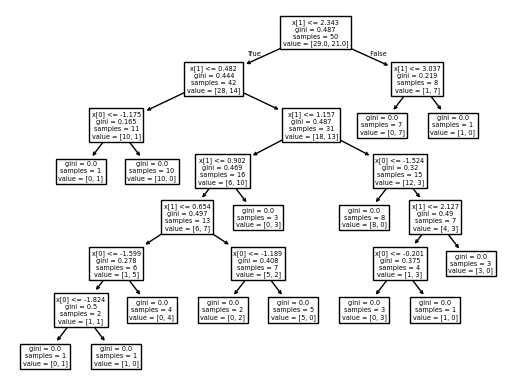

In [18]:
plot_tree(clf1)

[Text(0.4583333333333333, 0.95, 'x[0] <= 1.852\ngini = 0.471\nsamples = 50\nvalue = [19, 31]'),
 Text(0.375, 0.85, 'x[0] <= -0.165\ngini = 0.493\nsamples = 43\nvalue = [19, 24]'),
 Text(0.41666666666666663, 0.8999999999999999, 'True  '),
 Text(0.2916666666666667, 0.75, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.4583333333333333, 0.75, 'x[0] <= 0.18\ngini = 0.5\nsamples = 38\nvalue = [19, 19]'),
 Text(0.25, 0.65, 'x[0] <= 0.012\ngini = 0.375\nsamples = 8\nvalue = [6, 2]'),
 Text(0.16666666666666666, 0.55, 'x[0] <= -0.074\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.08333333333333333, 0.45, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.25, 0.45, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.3333333333333333, 0.55, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.6666666666666666, 0.65, 'x[0] <= 0.642\ngini = 0.491\nsamples = 30\nvalue = [13, 17]'),
 Text(0.5, 0.55, 'x[1] <= -0.267\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.4166666666666667, 0.4

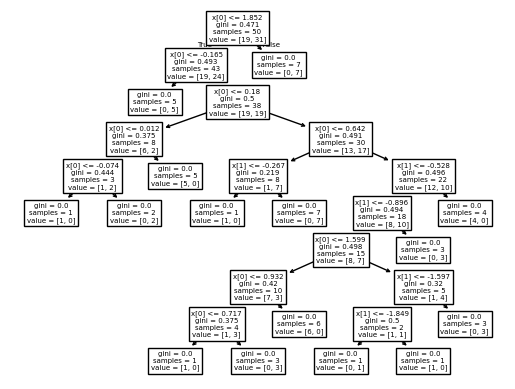

In [19]:
plot_tree(clf2)

[Text(0.4230769230769231, 0.9, 'x[0] <= -0.254\ngini = 0.499\nsamples = 50\nvalue = [24, 26]'),
 Text(0.15384615384615385, 0.7, 'x[0] <= -0.859\ngini = 0.08\nsamples = 24\nvalue = [1, 23]'),
 Text(0.28846153846153844, 0.8, 'True  '),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 19\nvalue = [0, 19]'),
 Text(0.23076923076923078, 0.5, 'x[1] <= -0.653\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.15384615384615385, 0.3, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.3076923076923077, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6923076923076923, 0.7, 'x[1] <= -2.078\ngini = 0.204\nsamples = 26\nvalue = [23, 3]'),
 Text(0.5576923076923077, 0.8, '  False'),
 Text(0.5384615384615384, 0.5, 'x[1] <= -2.827\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.46153846153846156, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.6153846153846154, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8461538461538461, 0.5, 'x[0] <= 0.518\ngini = 0.087\nsam

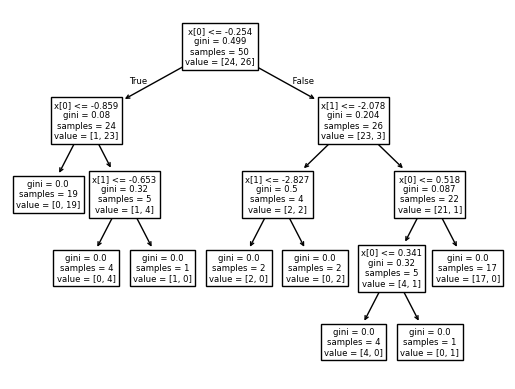

In [20]:
plot_tree(clf3)

In [21]:
clf1.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [22]:
clf2.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [23]:
clf3.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [24]:
df.sample(14,replace=True)

,col1,col2,col3,col4,col5,target
89,-0.507818,0.410178,0.208609,1.116010,0.075514,0
93,-1.319613,-1.607517,-0.487410,1.429831,0.483155,1
0,-1.054904,2.754232,-0.780038,0.540024,-0.054982,0
44,-1.901277,0.947198,-2.315801,1.297594,2.668107,0
73,-0.191861,-1.745377,-0.578523,-0.067384,0.835149,1
81,-0.616225,-1.925289,-0.469621,0.078396,0.812305,1
65,0.203166,0.321184,-1.766915,2.284586,2.071156,0
58,-1.615991,-0.625932,-1.473823,2.470391,-0.828306,1
18,-1.297422,1.370925,-2.941431,2.292480,1.254275,0
85,-0.031783,1.067369,0.190057,0.504459,0.868558,0
